In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import sys
# modify "customized_path_to_homework", path of folder in drive, where you uploaded your homework
customized_path_to_homework = "/content/drive/MyDrive/Colab Notebooks/assignment_3/dataset"
sys.path.append(customized_path_to_homework)

In [251]:
import os, sys
import pandas as pd
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import datetime
sys.path.insert(0,'../')
%load_ext autoreload
%autoreload 2
# import warnings filter
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
dt_training = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment_3/dataset/adult.data')
# sneak peak in the data
dt_training.head(1)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [22]:
dt_training.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
dt_training.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [31]:
dt_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/assignment_3/dataset/adult.test',header=None, skiprows=[0])
# sneak peak in the data
dt_test.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.


In [34]:
dt_test.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class']
dt_training.replace([np.inf, -np.inf], np.nan,inplace=True)
dt_test.replace([np.inf, -np.inf], np.nan,inplace=True)

In [39]:
dt_training.shape
dt_training.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [40]:
dt_test.shape
dt_test.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K.
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K.
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K.
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K.


In [51]:
categorical_variables = [var for var in dt_training.columns if dt_training[var].dtype=='O']
print(categorical_variables)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'class']


In [52]:
dt_training[categorical_variables].isnull().sum()

workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
class             0
dtype: int64

In [54]:
dt_training.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [57]:
dt_training['workclass'].replace('?', np.NaN, inplace=True)
dt_test['workclass'].replace('?', np.NaN, inplace=True)

dt_training['occupation'].replace('?', np.NaN, inplace=True)
dt_test['occupation'].replace('?', np.NaN, inplace=True)

dt_training['native-country'].replace('?', np.NaN, inplace=True)
dt_test['native-country'].replace('?', np.NaN, inplace=True)

dt_training['class'].replace('<=50K', '<=50K.', inplace=True)
dt_training['class'].replace('>50K', '>50K.', inplace=True)

In [59]:
numerical = [var for var in dt_training.columns if dt_training[var].dtype!='O']

In [61]:
dt_training[numerical].isnull().sum()

age               0
fnlwgt            0
education-num     0
capital-gain      0
capital-loss      0
hours-per-week    0
dtype: int64

In [102]:
#Initializing X_train,y_train,X_test,y_test

X_train= dt_training.drop(['class'], axis=1)
y_train = dt_training['class']
X_test = dt_test.drop(['class'], axis=1)
y_test = dt_test['class']

In [103]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [104]:
X_train.shape, X_test.shape

((32560, 14), (16281, 14))

In [105]:
#Replacing NA with frequent values
for df2 in [X_train, X_test]:
  df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
  df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
  df2['native-country'].fillna(X_train['native-country'].mode()[0], inplace=True)

In [106]:
X_test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
dtype: int64

In [76]:
pip install scikit-learn

In [107]:
from sklearn.preprocessing import LabelEncoder
categorical_variables = [var for var in X_train.columns if X_train[var].dtype=='O']
print(categorical_variables)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']


In [108]:
# Encode categorical features as a one‑hot numeric array using LabelEncoder.
labelencoder = LabelEncoder()
X_train["workclass"]= labelencoder.fit_transform(X_train["workclass"])
X_train["education"]= labelencoder.fit_transform(X_train["education"])
X_train["marital-status"]= labelencoder.fit_transform(X_train["marital-status"])
X_train["occupation"]= labelencoder.fit_transform(X_train["occupation"])
X_train["relationship"]= labelencoder.fit_transform(X_train["relationship"])
X_train["race"]= labelencoder.fit_transform(X_train["race"])
X_train["sex"]= labelencoder.fit_transform(X_train["sex"])
X_train["native-country"]= labelencoder.fit_transform(X_train["native-country"])
X_test["workclass"]= labelencoder.fit_transform(X_test["workclass"])
X_test["education"]= labelencoder.fit_transform(X_test["education"])
X_test["marital-status"]= labelencoder.fit_transform(X_test["marital-status"])
X_test["occupation"]= labelencoder.fit_transform(X_test["occupation"])
X_test["relationship"]= labelencoder.fit_transform(X_test["relationship"])
X_test["race"]= labelencoder.fit_transform(X_test["race"])
X_test["sex"]= labelencoder.fit_transform(X_test["sex"])
X_test["native-country"]= labelencoder.fit_transform(X_test["native-country"])

In [109]:
X_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4,257302,7,12,2,13,5,4,0,0,0,38,39
32556,40,4,154374,11,9,2,7,0,4,1,0,0,40,39
32557,58,4,151910,11,9,6,1,4,4,0,0,0,40,39
32558,22,4,201490,11,9,4,1,3,4,1,0,0,20,39


In [110]:
X_test

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,4,215419,9,13,0,10,1,4,0,0,0,36,38
16277,64,0,321403,11,9,6,0,2,2,1,0,0,40,38
16278,38,4,374983,9,13,2,10,0,4,1,0,0,50,38
16279,44,4,83891,9,13,0,1,3,1,1,5455,0,40,38


In [111]:
y_train

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32555     <=50K
32556      >50K
32557     <=50K
32558     <=50K
32559      >50K
Name: class, Length: 32560, dtype: object

In [136]:
#normalizing the features
cols = dt_training.columns.drop('class')
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')


In [138]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [140]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.65,2.0,-0.797262,-0.666667,1.000000,0.0,-0.428571,-0.333333,0.0,0.0,0.0,0.0,-5.4,0.0
1,0.05,0.0,0.312717,0.000000,-0.333333,-1.0,-0.142857,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.80,0.0,0.472711,-3.333333,-1.000000,0.0,-0.142857,-0.333333,-2.0,0.0,0.0,0.0,0.0,0.0
3,-0.45,0.0,1.342409,-0.666667,1.000000,0.0,0.428571,1.333333,-2.0,-1.0,0.0,0.0,0.0,-34.0
4,0.00,0.0,0.890927,0.333333,1.333333,0.0,-0.428571,1.333333,0.0,-1.0,0.0,0.0,0.0,0.0


**Exploratory Data Analysis**

In [142]:
import matplotlib.pylab as plt
import seaborn as sns
dt_training_data1= dt_training.dropna(axis=0)
pd.crosstab(dt_training_data1['occupation'], dt_training_data1['class'], margins=True)

class,<=50K,>50K,All
occupation,,,
?,1652,191,1843
Adm-clerical,3262,507,3769
Armed-Forces,8,1,9
Craft-repair,3170,929,4099
Exec-managerial,2098,1968,4066
Farming-fishing,879,115,994
Handlers-cleaners,1284,86,1370
Machine-op-inspct,1752,250,2002
Other-service,3158,137,3295


**Generated Cross tab comparision between Income and Occupation. The highest number of people
getting more than 50K are from Exec_managerial position. The highest number of people getting less
than 50K are from craft‑repair position.**

<Axes: >

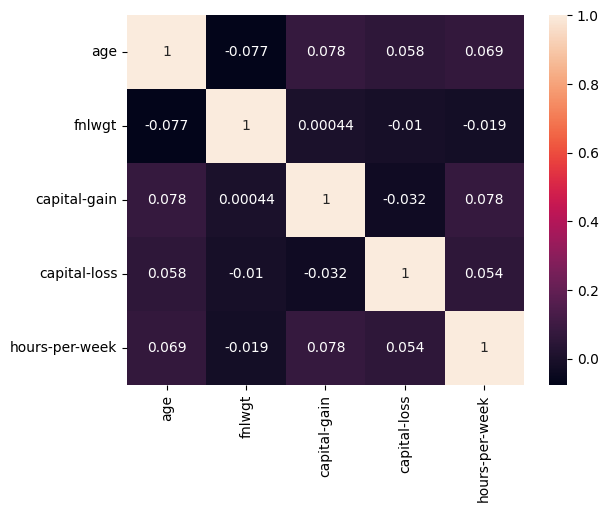

In [145]:
variable = ["age","fnlwgt","capital-gain","capital-loss","hours-per-week"]
corr = dt_training_data1[variable].corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=None)

**Generated correlation between various numerical features using heatmap.
The highest positive correlation is between age and hours_per_week.
The highest negative correlation is betweeen age and fnlwgt**

<Axes: xlabel='workclass', ylabel='count'>

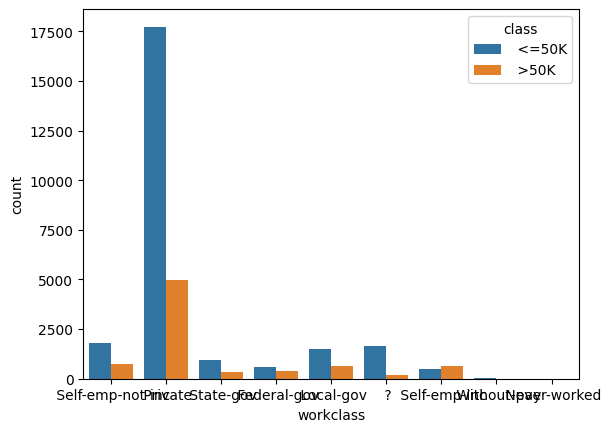

In [147]:
sns.countplot(x='workclass', hue='class', data=dt_training_data1)

**Created a countplot with workclass.
Private class are high in numbers**

<Axes: ylabel='Frequency'>

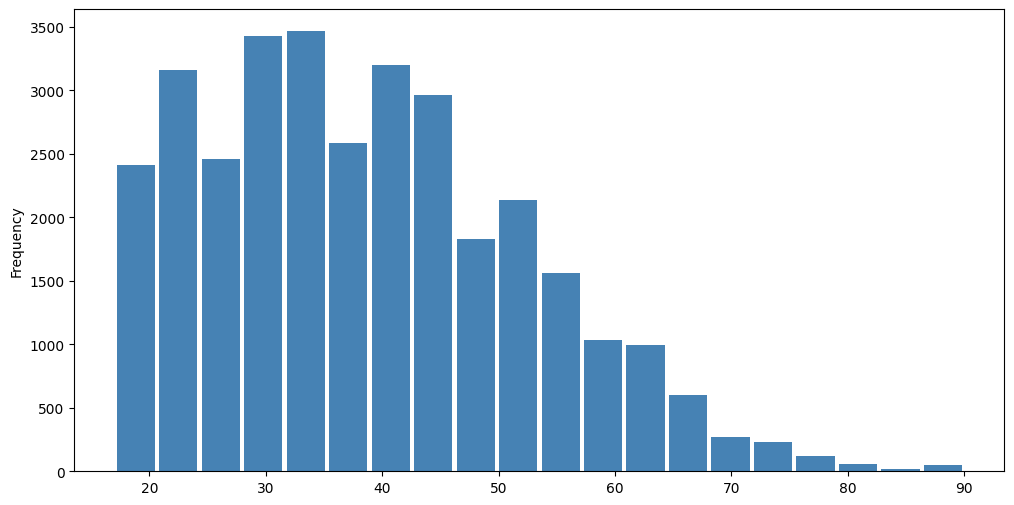

In [152]:
dt_training_data1['age'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='steelblue',zorder=2, rwidth=0.9)

**Histogram is generated on age features. People with ages between 30-35 are considered more
compared to other ages.**

<Axes: xlabel='race', ylabel='count'>

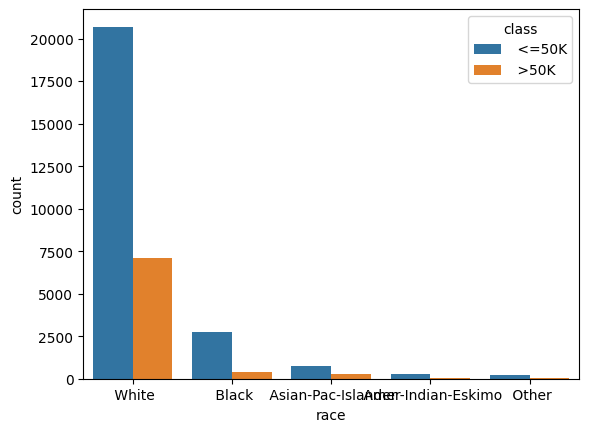

In [157]:
sns.countplot(x='race', hue='class', data=dt_training_data1,zorder=2)

**Countplot is created for race. White people are considered more in the dataset**

In [159]:
pd.crosstab(dt_training_data1['education'], dt_training_data1['class'], margins=True)

class,<=50K,>50K,All
education,,,
10th,871,62,933
11th,1115,60,1175
12th,400,33,433
1st-4th,162,6,168
5th-6th,317,16,333
7th-8th,606,40,646
9th,487,27,514
Assoc-acdm,802,265,1067
Assoc-voc,1021,361,1382


**Cross tab is created between Education and the Income. People who did prof‑school has more 50k
Income percentage compared to other Education**

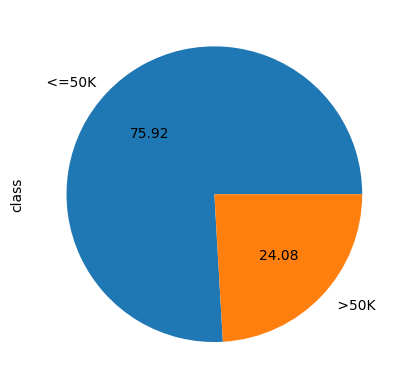

In [160]:
dt_training_data1['class'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

**Percentage of Income considered is given in a pie chart.
People with <=50K is considered more with people >50K**

<Axes: xlabel='age', ylabel='hours-per-week'>

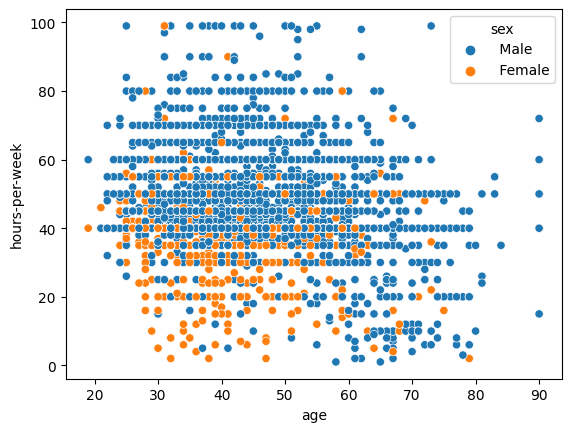

In [249]:
Income_greater_50K = dt_training_data1[dt_training_data1["class"] == " >50K"]
sns.scatterplot( x=Income_greater_50K["age"], y=Income_greater_50K["hours-per-week"], hue=Income_greater_50K['sex'])

**Scatterplot is considered between Age and hours_per_week for people earning more than 50k. The
plot is dense beween the age 30-40 and between hours_per week 40-60. As per the plot, male is
getting more than 50k compared to female**

**Machine Learning Models**

**Gaussian Naive Bayes classifier**

In [267]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


# instantiate the model
gnb = GaussianNB()
#5-fold cross validation
scores = cross_val_score(gnb, X_train, y_train, cv = 5, scoring='accuracy')
print('5 Cross validation score of GaussianNB model:{}'.format(scores))
print(" ")

# fit the model
gnb.fit(X_train, y_train)
print(" ")
y_pred1 = gnb.predict(X_train)
print(" ")
y_pred = gnb.predict(X_test)


print('Model accuracy score of GaussianNB model: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training accuracy score of GaussianNB model: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
print('The Classification Report of GaussianNB model\n\n'+(classification_report(y_test, y_pred)))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 Cross validation score of GaussianNB model:[0.79867936 0.79576167 0.80113636 0.79422604 0.80558968]
 
 
 
Model accuracy score of GaussianNB model: 0.0000
Training accuracy score of GaussianNB model: 0.7990


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

The Classification Report of GaussianNB model

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00       0.0
      <=50K.       0.00      0.00      0.00   12435.0
        >50K       0.00      0.00      0.00       0.0
       >50K.       0.00      0.00      0.00    3846.0

    accuracy                           0.00   16281.0
   macro avg       0.00      0.00      0.00   16281.0
weighted avg       0.00      0.00      0.00   16281.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [268]:
# train a DecisionTreeClassifier on the training set

from sklearn.tree import DecisionTreeClassifier

# instantiate the model

clf = DecisionTreeClassifier()

#5-fold cross validation
scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring='accuracy')
print('5 Cross validation score of DecisionTreeClassifier model:{}'.format(scores))

# fit the model
clf.fit(X_train, y_train)
y_pred1 = clf.predict(X_train)
y_pred = clf.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
print('The Classification Report of DecisionTreeClassification model\n\n'+classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:

5 Cross validation score of DecisionTreeClassifier model:[0.80773956 0.8022113  0.80666462 0.81342138 0.80605037]
Model accuracy score: 0.0000
Training accuracy score: 1.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Classification Report of DecisionTreeClassification model

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00       0.0
      <=50K.       0.00      0.00      0.00   12435.0
        >50K       0.00      0.00      0.00       0.0
       >50K.       0.00      0.00      0.00    3846.0

    accuracy                           0.00   16281.0
   macro avg       0.00      0.00      0.00   16281.0
weighted avg       0.00      0.00      0.00   16281.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [269]:
# train a LogisticRegression on the training set

from sklearn.linear_model import LogisticRegression

# instantiate the model

lr= LogisticRegression( solver='lbfgs',max_iter = 700)

#5-fold cross validation
scores = cross_val_score(lr, X_train, y_train, cv = 5, scoring='accuracy')
print('5 Cross validation score of Logistic Regression model:{}'.format(scores))

# fit the model
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_train)
y_pred = lr.predict(X_test)

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Training accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred1)))
print('The Classification Report of Logistic Regression model\n\n'+classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


5 Cross validation score of Logistic Regression model:[0.82463145 0.82340295 0.82708845 0.82555283 0.82662776]
Model accuracy score: 0.0000
Training accuracy score: 0.8255


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Classification Report of Logistic Regression model

              precision    recall  f1-score   support

       <=50K       0.00      0.00      0.00       0.0
      <=50K.       0.00      0.00      0.00   12435.0
        >50K       0.00      0.00      0.00       0.0
       >50K.       0.00      0.00      0.00    3846.0

    accuracy                           0.00   16281.0
   macro avg       0.00      0.00      0.00   16281.0
weighted avg       0.00      0.00      0.00   16281.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

**We can find that the DecisionTreeClassifier overfits as the training accuracy is 1.000. In order to tackle this, we can change the max_depth..**

**The LogicalRegression performs well compared to other ml models as it has more accuracy score.  Decision Tree outperforms other ml models if we set max_depth to 5 as it avoids overfitting. Gaussian NB considers all features to be conditionally independent and thats the reason for its underperformance**